In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("bitcoin.csv")
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [3]:
df.Timestamp=pd.to_datetime(df.Timestamp,unit="s")
df.index=df.Timestamp
df=df.resample("M").mean()

In [4]:
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091
...,...,...,...,...,...,...,...
2020-11-30,16535.778528,16545.663704,16525.571002,16536.023486,6.695166,111021.991229,16535.990325
2020-12-31,21811.751812,21826.119052,21796.889787,21812.155606,5.742400,129237.684380,21811.782847
2021-01-31,34554.125793,34594.169353,34512.497779,34554.252479,10.253061,352510.183906,34552.337249


In [5]:
df.shape

(112, 7)

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

In [7]:
df.rename({"Volume_(BTC)":"Volume_BTC"},axis=1,inplace=True)
df.rename({"Volume_(Currency)":"Volume_Currency"},axis=1,inplace=True)

In [8]:
df.isna().sum()

Open               0
High               0
Low                0
Close              0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
dtype: int64

In [9]:
df.corr()

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Open,1.000000,1.000000,1.000000,1.000000,-0.329473,0.891733,1.000000
High,1.000000,1.000000,1.000000,1.000000,-0.329385,0.891842,1.000000
Low,1.000000,1.000000,1.000000,1.000000,-0.329571,0.891600,1.000000
Close,1.000000,1.000000,1.000000,1.000000,-0.329471,0.891728,1.000000
Volume_BTC,-0.329473,-0.329385,-0.329571,-0.329471,1.000000,-0.222282,-0.329486
Volume_Currency,0.891733,0.891842,0.891600,0.891728,-0.222282,1.000000,0.891721
Weighted_Price,1.000000,1.000000,1.000000,1.000000,-0.329486,0.891721,1.000000


<AxesSubplot:>

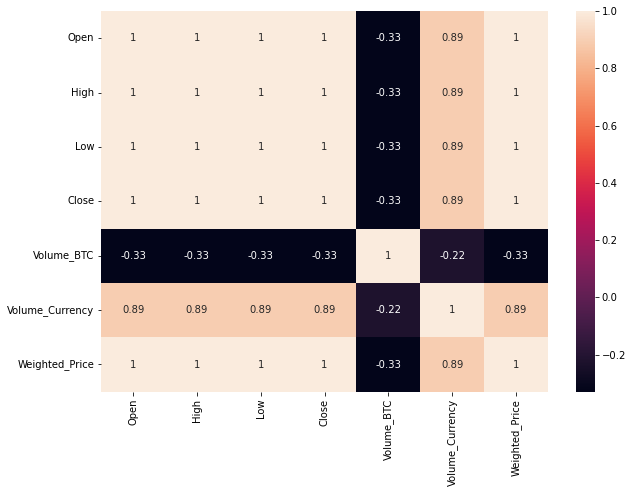

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

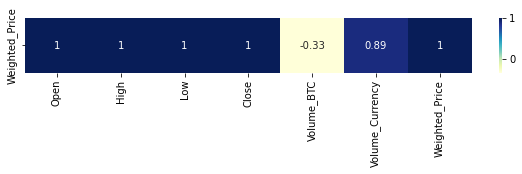

In [11]:
plt.figure(figsize=(10,1))
sns.heatmap(df.corr().tail(1),annot=True,cmap="YlGnBu")

In [12]:
prices=df.Weighted_Price

<AxesSubplot:xlabel='Timestamp', ylabel='Weighted_Price'>

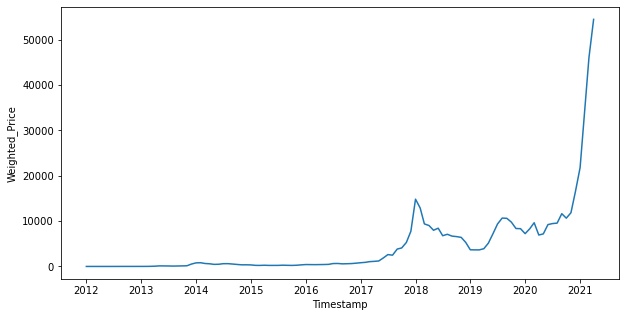

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.index,y=prices)

# Percentage of NaN values

<AxesSubplot:>

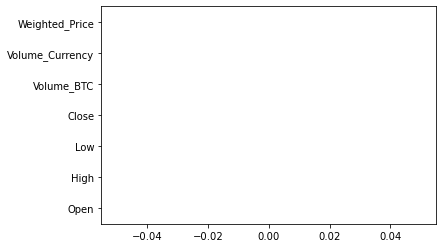

In [14]:
per_NaN_val=((df.isna().sum() / df.shape[0])*100)
per_NaN_val.sort_values(ascending=False).plot(kind="barh")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2011-12-31 to 2021-03-31
Freq: M
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             112 non-null    float64
 1   High             112 non-null    float64
 2   Low              112 non-null    float64
 3   Close            112 non-null    float64
 4   Volume_BTC       112 non-null    float64
 5   Volume_Currency  112 non-null    float64
 6   Weighted_Price   112 non-null    float64
dtypes: float64(7)
memory usage: 7.0 KB


In [16]:
# fill NaN values
df["Open"]=df["Open"].fillna(df["Open"].median())
df["High"]=df["High"].fillna(df["High"].median())
df["Low"]=df["Low"].fillna(df["Low"].median())
df["Close"]=df["Close"].fillna(df["Close"].median())
df["Volume_BTC"]=df["Volume_BTC"].fillna(df["Volume_BTC"].median())
df["Volume_Currency"]=df["Volume_Currency"].fillna(df["Volume_Currency"].median())
df["Weighted_Price"]=df["Weighted_Price"].fillna(df["Weighted_Price"].median())

In [17]:
df.isna().sum()

Open               0
High               0
Low                0
Close              0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
dtype: int64

In [18]:
x=df.drop("Weighted_Price",axis=1)
y=df["Weighted_Price"]

# Spliting

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Model Training

## 1.Using Linear Regression

In [20]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

## Testing Data Evaluation

In [21]:
y_pred_test=reg_model.predict(x_test)

MSE=mean_squared_error(y_test,y_pred_test)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_test,y_pred_test)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_test,y_pred_test)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :0.07355335975223985

Mean Absolute Error :0.17127868038448518

Accuracy of model :0.9999999958646882


## Training Data Accuracy

In [22]:
y_pred_train=reg_model.predict(x_train)

MSE=mean_squared_error(y_train,y_pred_train)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_train,y_pred_train)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_train,y_pred_train)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :0.029193696063968582

Mean Absolute Error :0.10078846625611786

Accuracy of model :0.999999999630439


## 2.Using Decision Tree

In [23]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

## Testing Data Accuracy

In [24]:
y_pred_test=dt_model.predict(x_test)

MSE=mean_squared_error(y_test,y_pred_test)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_test,y_pred_test)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_test,y_pred_test)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :241399.43100412685

Mean Absolute Error :263.8298125701092

Accuracy of model :0.9864280584874298


## Training Data Accuracy

In [25]:
y_pred_train=dt_model.predict(x_train)

MSE=mean_squared_error(y_train,y_pred_train)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_train,y_pred_train)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_train,y_pred_train)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :0.0

Mean Absolute Error :0.0

Accuracy of model :1.0


# Hyperparameter Tunning

In [26]:
dt_model=DecisionTreeRegressor()
hyp_para={"max_depth":np.arange(2,10),
         "min_samples_leaf":np.arange(1,15),
         "min_samples_split":np.arange(2,15)}
rscv_model=RandomizedSearchCV(dt_model,hyp_para,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [27]:
rscv_model.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=10)

In [28]:
rscv_model.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 9}

# Model Training

In [29]:
dt_model=DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=12)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=12)

## Testing Data Evaluation

In [30]:
y_pred_test=dt_model.predict(x_test)

MSE=mean_squared_error(y_test,y_pred_test)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_test,y_pred_test)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_test,y_pred_test)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :421556.870310843

Mean Absolute Error :445.5996638685958

Accuracy of model :0.97629925984381


## Training Data Evaluation

In [31]:
y_pred_train=dt_model.predict(x_train)

MSE=mean_squared_error(y_train,y_pred_train)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_train,y_pred_train)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_train,y_pred_train)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :15368600.682345005

Mean Absolute Error :1176.1851499186837

Accuracy of model :0.8054499064962848


## 3.Random Forest

In [32]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

## Testing Data Accuracy

In [33]:
y_pred_test=rf_model.predict(x_test)

MSE=mean_squared_error(y_test,y_pred_test)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_test,y_pred_test)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_test,y_pred_test)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :45551.09357852817

Mean Absolute Error :127.77461817773958

Accuracy of model :0.9974390296807666


## Training Data Accuracy

In [34]:
y_pred_train=rf_model.predict(x_train)

MSE=mean_squared_error(y_train,y_pred_train)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_train,y_pred_train)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_train,y_pred_train)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :800915.5207804509

Mean Absolute Error :185.1319855814408

Accuracy of model :0.9898612637105333


# Hyperparameter Tunning

In [35]:
random_model=RandomForestRegressor()
hyp_para={"n_estimators":np.arange(10,100),
         "max_depth":np.arange(2,10),
         "min_samples_leaf":np.arange(1,15),
         "min_samples_split":np.arange(2,15)}
rscv_model=RandomizedSearchCV(random_model,hyp_para,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [36]:
rscv_model.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=95)

In [37]:
rscv_model.best_params_

{'n_estimators': 95,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 5}

# Model Training

In [38]:
rf_model=RandomForestRegressor(max_depth=5, min_samples_split=3, min_samples_leaf=1,n_estimators=81)
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=3, n_estimators=81)

## Testing Data Accuracy

In [39]:
y_pred_test=rf_model.predict(x_test)

MSE=mean_squared_error(y_test,y_pred_test)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_test,y_pred_test)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_test,y_pred_test)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :68935.55637766342

Mean Absolute Error :182.56436664870236

Accuracy of model :0.9961243100888745


## Training Data Accuracy

In [40]:
y_pred_train=rf_model.predict(x_train)

MSE=mean_squared_error(y_train,y_pred_train)
print(f"Mean Square Error :{MSE}")
print()
MAE=mean_absolute_error(y_train,y_pred_train)
print(f"Mean Absolute Error :{MAE}")
print()
R2_Score=r2_score(y_train,y_pred_train)
print(f"Accuracy of model :{R2_Score}")

Mean Square Error :1300401.7054233516

Mean Absolute Error :259.67007367533574

Accuracy of model :0.9835383013319401


## Accuracies of Model using Linear Regression

Testing Data Accuracy :0.99 

Training Data Accuracy :0.99   

## Accuracies of Model using Decision Tree

Testing Data Accuracy :0.92 
Training Data Accuracy :1
    
Using Hyperparametric Tunning

Testing Data Accuracy :0.96 
Training Data Accuracy :0.78

## Accuracies of Model using Random Forest

Testing Data Accuracy :0.99
Training Data Accuracy :0.99
    
Using Hyperparametric Tunning

Testing Data Accuracy :0.99 
Training Data Accuracy :0.97

# API

In [41]:
rf_model.predict(x_train)

array([5.98345514e+02, 7.18491060e+03, 4.47241466e+02, 2.73239733e+03,
       4.39234621e+02, 2.83046587e+02, 5.18520314e+03, 5.96299571e+02,
       5.98345514e+02, 6.59159213e+02, 3.43555055e+01, 5.61384078e+02,
       1.18614415e+04, 4.90115178e+01, 4.44439612e+04, 5.92082544e+02,
       3.53253198e+02, 3.61590253e+03, 2.83046587e+02, 2.73239733e+03,
       9.26808103e+03, 6.90372980e+03, 2.75193800e+02, 6.92047151e+03,
       9.97097061e+02, 5.35231390e+03, 5.67294714e+02, 3.57231259e+02,
       1.29544808e+04, 8.33560807e+03, 3.43555055e+01, 8.33975854e+03,
       4.23773221e+01, 8.37392453e+03, 2.63627679e+02, 4.39234621e+02,
       2.78248386e+02, 9.23603233e+03, 4.36005901e+02, 6.98410917e+02,
       3.67257606e+04, 2.83046587e+02, 1.13842501e+03, 5.35231390e+03,
       1.18614415e+04, 4.39234621e+02, 6.31956514e+01, 3.43555055e+01,
       5.96299571e+02, 2.04864031e+04, 3.53253198e+02, 3.59194395e+03,
       3.43555055e+01, 8.26392798e+02, 3.43555055e+01, 9.18541577e+03,
      

In [42]:
rf_model.predict(x_test)

array([10210.46912257,   278.24838614,   589.92589621,  6847.55175793,
        3838.92394295,  9280.11928992,  6982.7067406 ,   598.34551414,
         357.23125904,   278.24838614,  2226.59933477,  9983.74076105,
          34.35550553,  7162.37230154, 10188.9283451 ,   467.1578751 ,
        9299.60406896,  8335.60806733,  9197.80013947,   275.1938003 ,
        9758.41201091,    57.14631266,  6903.72980391])

In [43]:
rf_model.predict(x_test.head(1))

array([10210.46912257])

In [44]:
x_test.iloc[1:2]

,Open,High,Low,Close,Volume_BTC,Volume_Currency
Timestamp,,,,,,
2015-08-31,250.83237,250.913152,250.737445,250.826444,14.239493,3427.085319


In [45]:
x_test.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_BTC', 'Volume_Currency'], dtype='object')

In [46]:
def predict_class(Open,High,Low,Close,Volume_BTC,Volume_Currency):
    prediction=rf_model.predict([[Open,High,Low,Close,Volume_BTC,Volume_Currency]])
    
    return prediction

predict_class(250.83237,250.913152,250.737445,250.826444,14.239493,3427.085319)

array([278.24838614])

In [47]:
import pickle
import os

model_folder_path='model'
if not os.path.exists(model_folder_path):
    os.mkdir(model_folder_path)
    
pickle.dump(rf_model,open(f'{model_folder_path}/model.pkl','wb'))